In [147]:
from src import DATA_DIR
import datetime as dt

In [142]:
def read_csv_file(path, index_col=None):
    if index_col is None:
        return pd.read_csv(path)

    else:
        return pd.read_csv(path, index_col=index_col)

In [440]:
# Since pytrends is returning a DataFrame object, we need pandas:
import pandas as pd
# Import of pytrends (needs to be pip installed first):
from pytrends.request import TrendReq

pytrends = TrendReq(tz=360)
kw_list = ['شیرآلات']

search_df = pytrends.get_historical_interest(kw_list,
                                             year_start=2022,
                                             month_start=3,
                                             day_start=19,
                                             hour_start=0,
                                             
                                             year_end=2022,
                                             month_end=5,
                                             day_end=27,
                                             hour_end=23,
                                             
                                             cat=0, geo='', gprop='', sleep=60)

In [385]:
df = search_df.iloc[:, :]
day, hour, time = [], [], []
for i in range(len(df)):
    day.append(weekday[df.index[i].weekday()])
    hour.append(f'{df.index[i].hour}:00')
    time.append(str(dt.datetime.strptime(str(df.index[i]), '%Y-%m-%d %H:%M:%S')))
    
df['Weekday'] = day
df['hour'] = hour
df['Date'] = time

In [441]:
shou = read_csv_file(DATA_DIR / "TV.csv")
time = []
for i in range(len(shou)):
    time.append(str(dt.datetime.strptime(shou.Date[i], '%Y/%m/%d %H:%M:%S')))

shou['Date'] = time

In [442]:
weekday = {
    5: 'Saturday',
    6: 'Sunday',
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
}

In [443]:
time__ = []
a = dt.datetime.strptime("2022/03/19 00:00:00", '%Y/%m/%d %H:%M:%S')
for i in range(70*24):
    time__.append(str(a + timedelta(hours=i)))

df_ = pd.DataFrame(time__, columns=['Date'])

In [444]:
list1 = []
for i in range(len(df_.Date)):
    if str(df.Date[i]) in list(df_.Date):
        list1.append(df.loc[df.Date == df.Date[i]].iloc[0, 0])
    else:
        list1.append(0)

df_['شیرآلات'] = list1

In [445]:
day, hour, time = [], [], []
for i in range(len(df_)):
    _ = dt.datetime.strptime(str(df_.Date[i]), '%Y-%m-%d %H:%M:%S')
    time.append(_)
    day.append(weekday[_.weekday()])
    hour.append(f'{_.hour}:00')
    
df_['Weekday'] = day
df_['hour'] = hour
df_['Date'] = time

In [484]:
i = 6
part_one = df_.iloc[168*i:(i+1)*168, :]

In [485]:
list_ = []
data = []

list__ = []
text = []

for i in part_one.Weekday.unique():
    _ = part_one.loc[part_one.Weekday == i]
    
    for j in range(len(_)):
        list_.append(list(_['شیرآلات'])[j])
        
        if str(list(_.Date)[j]) in list(shou.Date):
            list__.append(shou.loc[shou.Date == str(list(_.Date)[j])].iloc[0, 1])
        
        else:
            list__.append("")
    
    data.append(list_)
    list_ = []
    
    text.append(list__)
    list__ = []

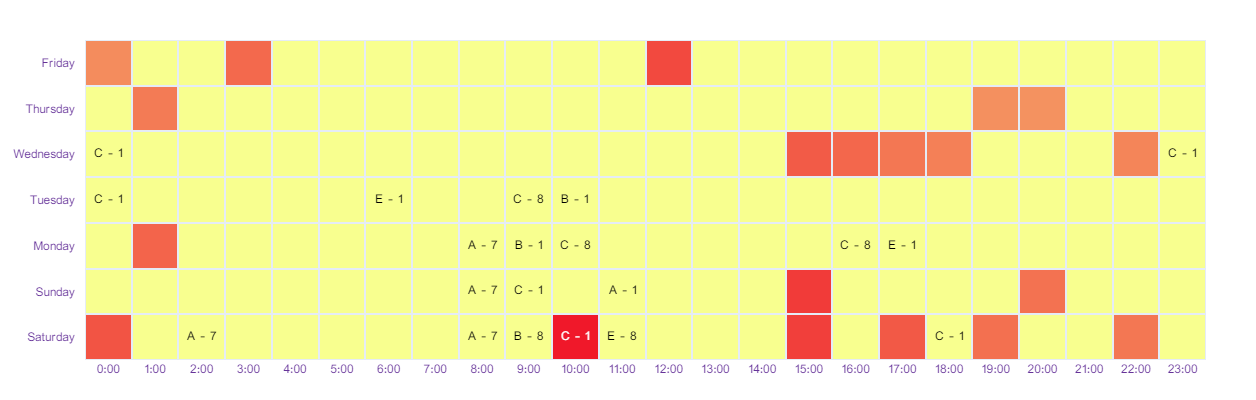

In [486]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(data,
                                  x=list(part_one.hour.unique()),
                                  y=list(part_one.Weekday.unique()),
                                  annotation_text=text,
                                  colorscale=["rgb(248, 255, 143)","rgb(240, 24, 42)"],
                                  xgap=2,
                                  ygap=2
                                 )

fig.update_layout(autosize=False, width=1200, height=400,
                  margin=dict(l=50, r=50, t=40, b=40),
                  font=dict(
                       family="IRANSans",
                       size=12,
                       color="RebeccaPurple"
                   ))

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig['layout']['xaxis']['side'] = 'bottom'

fig.show()